Радиус равен 0.1
Истинная вероятность: 0.007853981633974483
Оценка вероятности: 0.0075


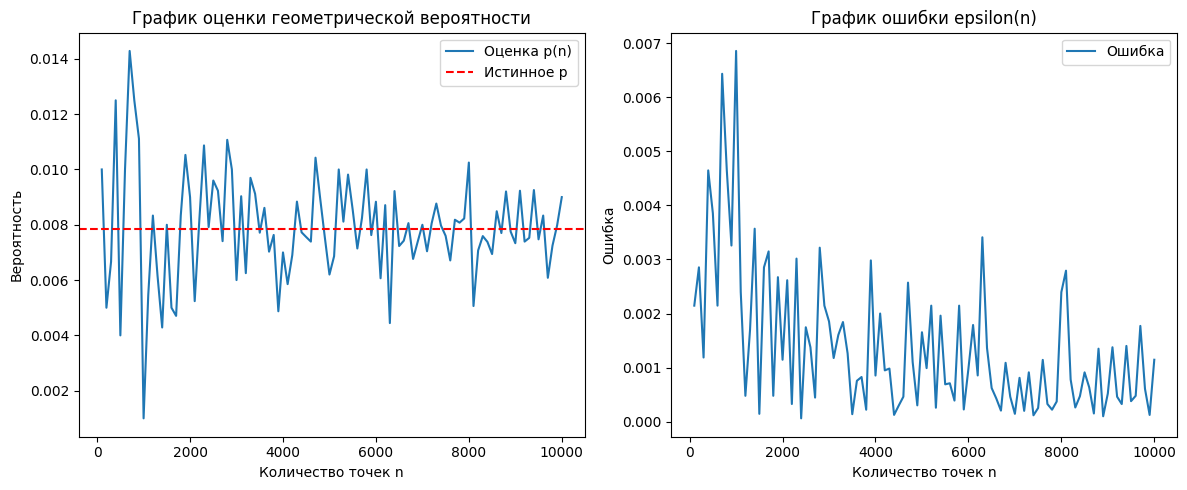

Радиус равен 0.2
Истинная вероятность: 0.031415926535897934
Оценка вероятности: 0.0334


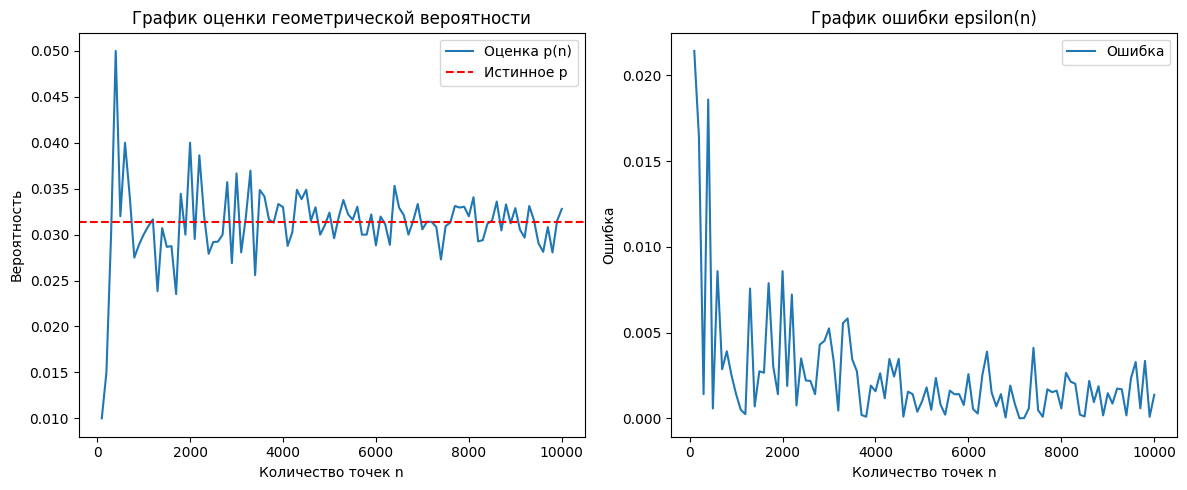

Радиус равен 0.5
Истинная вероятность: 0.19634954084936207
Оценка вероятности: 0.1954


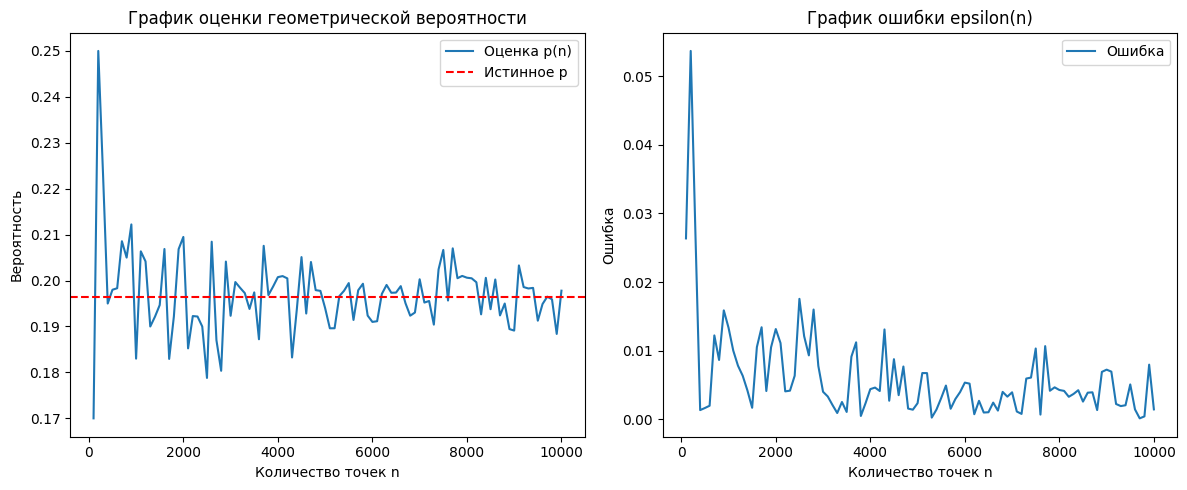

Радиус равен 0.75
Истинная вероятность: 0.44178646691106466
Оценка вероятности: 0.4426


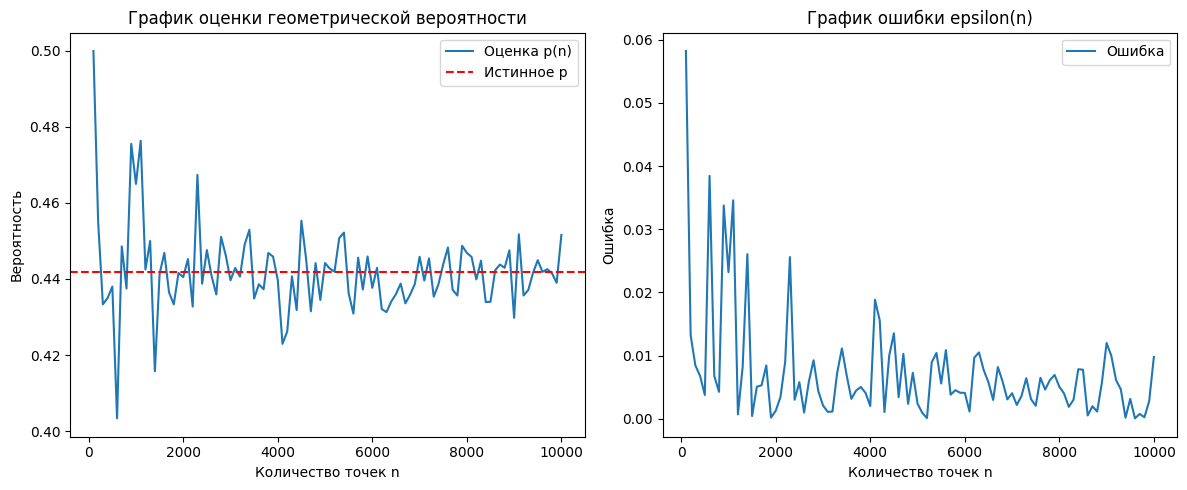

Радиус равен 0.99
Истинная вероятность: 0.769768739945839
Оценка вероятности: 0.7715


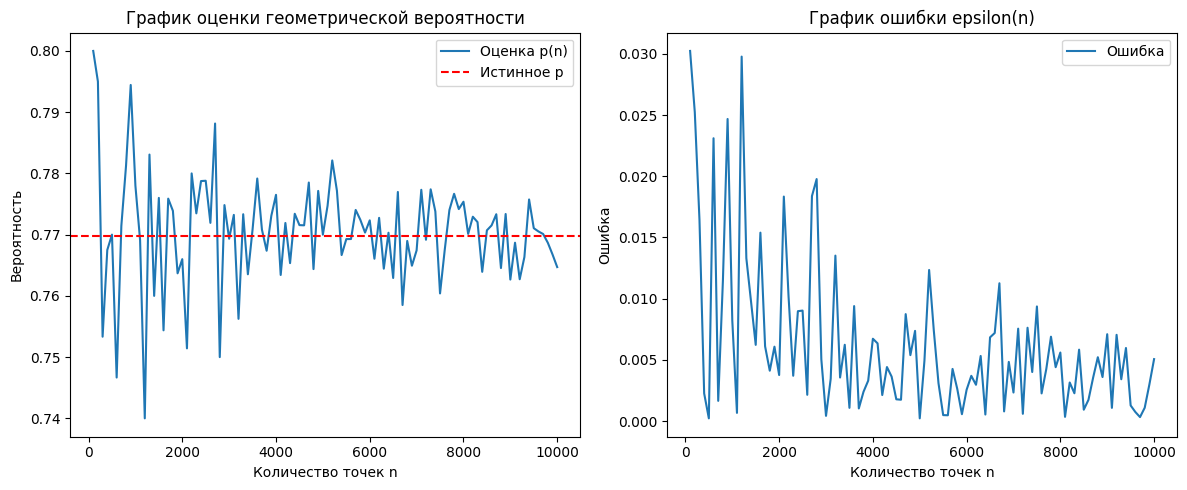

In [12]:
import numpy as np
import matplotlib.pyplot as plt

a = 1.0       
r_list = [0.1, 0.2, 0.5, 0.75, 0.99]   
N = 10000    

for r in r_list:
    print("Радиус равен", r)
    # Вычисление истинной вероятности попадания в круг
    p_true = (np.pi * r**2) / (4 * a**2)

    # Генерация случайных точек и оценка вероятности
    x = np.random.uniform(-a, a, N)
    y = np.random.uniform(-a, a, N)
    inside = (x**2 + y**2) <= r**2
    p_estimate = np.sum(inside) / N
    epsilons = [10**(-i) for i in range(1,5)]
    results = {} 
    N_list = []  # Список для хранения минимального N для каждого значения ε

    print("Истинная вероятность:", p_true)
    print("Оценка вероятности:", p_estimate)

    # Подготовка массивов для хранения оценок вероятности и ошибок
    points = np.arange(100, N+1, 100)
    p_estimates = []
    errors = []

    # Расчёт оценки вероятности и ошибки для различных n
    for n in points:
        x = np.random.uniform(-a, a, n)
        y = np.random.uniform(-a, a, n)
        inside = (x**2 + y**2) <= r**2
        p_est = np.sum(inside) / n
        p_estimates.append(p_est)
        errors.append(abs(p_est - p_true))

    # Создание фигуры с 2 подграфиками в 2 столбца
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # График оценки вероятности
    ax1.plot(points, p_estimates, label="Оценка p(n)")
    ax1.axhline(y=p_true, color='r', linestyle='--', label="Истинное p")
    ax1.set_xlabel("Количество точек n")
    ax1.set_ylabel("Вероятность")
    ax1.set_title("График оценки геометрической вероятности")
    ax1.legend()

    # График ошибки
    ax2.plot(points, errors, label="Ошибка")
    ax2.set_xlabel("Количество точек n")
    ax2.set_ylabel("Ошибка")
    ax2.set_title("График ошибки epsilon(n)")
    ax2.legend()

    plt.tight_layout()
    plt.show()

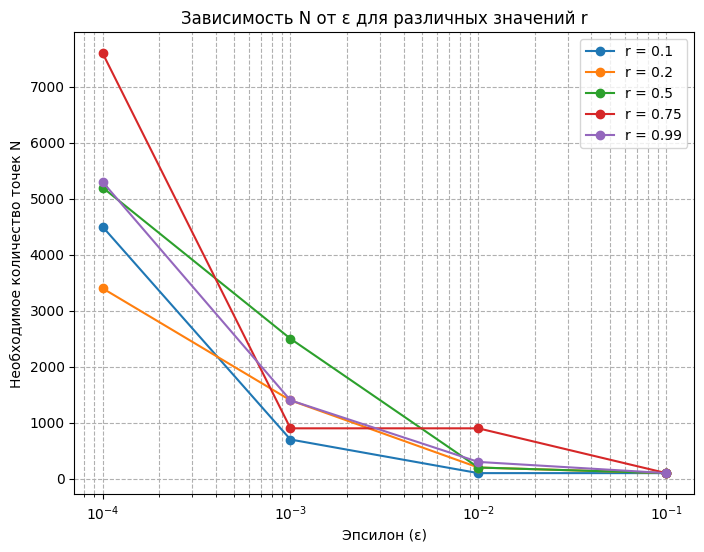

In [ ]:
a = 1.0       
r_list = [0.1, 0.2, 0.5, 0.75, 0.99]   
epsilons = [10**(-i) for i in range(1, 5)]  

results = {}  # Словарь для хранения, для каждого r – список минимальных N для epsilons

# Для каждого радиуса вычисляем истинную вероятность попадания в круг
for r in r_list:
    p_true = (np.pi * r**2) / (4 * a**2)
    N_list = []  
    
    # Для каждого eps находим минимальное число точек, чтобы |p_est - p_true| < eps
    for eps in epsilons:
        count = 100  # Начинаем с 100 точек
        while True:
            x = np.random.uniform(-a, a, count)
            y = np.random.uniform(-a, a, count)
            inside = (x**2 + y**2) <= r**2
            p_est = np.sum(inside) / count  # оценка вероятности
            
            if abs(p_est - p_true) < eps:
                N_list.append(count)
                break
            else:
                count += 100  # Увеличиваем число точек для повышения точности
                if count > 1e6:  # Ограничение для избежания бесконечного цикла
                    N_list.append(count)
                    break
    results[r] = N_list

plt.figure(figsize=(8, 6))
for r in r_list:
    plt.plot(epsilons, results[r], marker='o', label=f"r = {r}")

plt.xlabel("Эпсилон (ε)")
plt.ylabel("Необходимое количество точек N")
plt.title("Зависимость N от ε для различных значений r")
plt.xscale('log')  # Логарифмическая шкала по оси x для удобства
plt.legend()
plt.grid(True, which="both", linestyle='--')
plt.show()
